# Задача: классификация стекла
Часто на месте преступления остаются осколки разных видов стекол, которые можно использовать как улики, если определить тип стекла и от каких оно объектов. [Выборка](https://archive.ics.uci.edu/ml/machine-learning-databases/glass/) состоит из 9 признаков - химических параметров образцов и 214 объектов. Необходимо каждому образцу сопоставить один из 6 классов (например: стекло автомобиля, осколок посуды, окно здания) и сравнить качество работы решающего дерева и алгоритма решающего дерева и алгоритма k-ближайших соседей. В качестве функции ошибки использовать долю неправильных ответов классификатора. Дает ли масштабирование признаков значительное улучшение в качестве классификации? 

## Первое знакомство с данными

In [1]:
import pandas as pd
import sklearn as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [2]:
columnNames = ['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'] 
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names = columnNames, header=None)

In [3]:
df = data.drop(list(data)[0], 1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Посмотрим на соотношение классов.

In [4]:
X = df.drop(list(df)[9], 1)
target = df['Type of glass']
for i in range(1, 8):
    print("{0} - {1}".format(i, sum([target[j] == i for j in range(target.shape[0])])))

1 - 70
2 - 76
3 - 17
4 - 0
5 - 13
6 - 9
7 - 29


## Обучение моделей
В качестве критерия сравнения моделей решающего дерева и метода ближайших соседей будем сравнивать доли неправильных ошибок, усреднённых по кросс-валидации с 3 фолдами. Для воспроизводимости результата зафиксируем seed.

In [5]:
clf1 = tree.DecisionTreeClassifier()
np.random.seed(0)
c_v_s = model_selection.cross_val_score(clf1, X, target, cv = 3)
1 - c_v_s.mean()

0.4181989705565946

In [6]:
res = []
k = [i for i in range(1, 20)]
for i in range(1, 20):
    clf2 = KNeighborsClassifier(n_neighbors=i)
    c_v_s = model_selection.cross_val_score(clf2, X, target, cv = 3)
    res.append(1 - c_v_s.mean())
min(res)

0.36784947838224025

## Масштабирование признаков
Сравним результаты работы моделей после масштабирования признаков. Для метода ближайших соседей построим график зависимости доли ошибок классификатора от числа соседей.

In [7]:
np.random.seed(0)
scaler = StandardScaler()
scaler.fit(X, target)
X_scaled = scaler.transform(X)
clf1 = tree.DecisionTreeClassifier()
c_v_s = model_selection.cross_val_score(clf1, X_scaled, target, cv = 3)
1 - c_v_s.mean()

0.42270347506109907

In [8]:
res1 = []
for i in range(1, 20):
    clf2 = KNeighborsClassifier(n_neighbors=i)
    c_v_s = model_selection.cross_val_score(clf2, X, target, cv = 3)
    res1.append(1 - c_v_s.mean())
min(res1)

0.36784947838224025

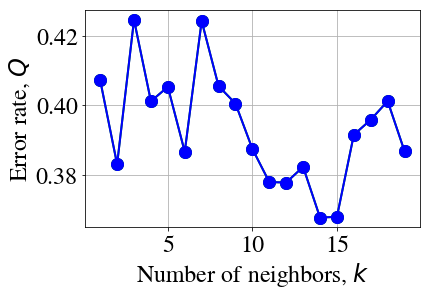

In [9]:
fig, ax = plt.subplots(1, 1)
plt.xlabel('Number of neighbors, $k$')
plt.ylabel('Error rate, $Q$')
plt.plot(k, res, 'g-', marker='o')
plt.plot(k, res1, 'b-', marker='o')
plt.grid()
plt.savefig('1.svg')

# Выводы
Видим, что качество алгоритма метода ближайших соседей при кросс-валидации с количеством фолдов = 3 будет наилучшим при k = 14 и при таких условиях эффективнее алгоритма решающего дерева с параметрами по умолчанию. Как и следовало ожидать, масштабирование признаков не изменяет качество работы алгоритма ближайших соседей, а для решающего дерева даже немного ухудшает.